In [1]:
import torch
import torch.nn as nn

In [6]:
import matplotlib.pyplot as plt

In [5]:
T = 50      # Input sequence length
C = 20      # Number of classes (including blank)
N = 16      # Batch size
S = 30      # Target sequence length of longest target in batch
S_min = 10  # Minimum target length, for demonstration purposes


input = torch.randn(T, N, C).log_softmax(2).detach().requires_grad_()
# Initialize random batch of targets (0 = blank, 1:C = classes)
target = torch.randint(low=1, high=C, size=(N, S), dtype=torch.long)

input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.long)
target_lengths = torch.randint(low=S_min, high=S, size=(N,), dtype=torch.long)
ctc_loss = nn.CTCLoss()

print(input.shape)

print(target.shape)

print(input_lengths)
print(target_lengths)

loss = ctc_loss(input, target, input_lengths, target_lengths)
print(loss)
loss.backward()

torch.Size([50, 16, 20])
torch.Size([16, 30])
tensor([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50])
tensor([13, 25, 11, 17, 14, 25, 11, 27, 19, 10, 11, 29, 24, 26, 20, 22])
tensor(7.0924, grad_fn=<MeanBackward0>)


In [14]:
m = nn.LogSoftmax()
n = nn.functional.log_softmax

input = torch.randn(2, 3)
output = m(input)
print(output)

output = n(input)
print(output)

C:\Users\JW\AppData\Local\Continuum\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  """


tensor([[-1.9972, -0.4740, -1.4198],
        [-2.4634, -0.5638, -1.0619]])


C:\Users\JW\AppData\Local\Continuum\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([[-1.9972, -0.4740, -1.4198],
        [-2.4634, -0.5638, -1.0619]])


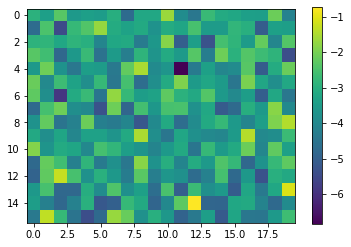

In [10]:
plt.imshow(input[0, :, :].detach().numpy())
plt.colorbar()
plt.show()